## 1. Create a python function to scrape Yelp data for 50 restaurants close to you. Think about what data you want to scrape aside from the restaurant name and location. You must pick at least three other fields. You can use beautiful soup, selenium, scrapy, and/or splinter as possible.

In [1]:
from bs4 import BeautifulSoup as bs
import requests

#need to look at terms and conditions to know if you can scrape the website
#most websites have a file called robots.txt that you can look at to see
#if scraping is allowed. ex: google.com/robots.txt
url = 'https://www.yelp.com/search?find_desc=restaurants&find_loc=63110'

In [2]:
response = requests.get(url)
response

<Response [200]>

In [3]:
soup = bs(response.text, 'html.parser')

In [4]:
for item in soup.select('[class*=container]'):
    try:
        print(item)


    except Exception as e:
        raise e
        print('')

<div class="consumer-header-container__09f24__2Eohm border--bottom__09f24__3lElq border-color--default__09f24__3Epto background-color--white__09f24__1ILUw"><div class="consumer-header__09f24__2i2ea border-color--default__09f24__3Epto"><div class="arrange__09f24__1Vghi vertical-align-middle__09f24__38J3B border-color--default__09f24__3Epto"><div class="logo-arrange-unit__09f24__8NkP4 arrange-unit__09f24__eFC_S border-color--default__09f24__3Epto"><div class="margin-r4__09f24__tWpSX margin-sm-r0__09f24__2Eago border-color--default__09f24__3Epto"><div class="logo__09f24__3bxnN logo-image__09f24__1Wq8S logo-container__09f24__1xVF_ border-color--default__09f24__3Epto" data-analytics-label="logo" id="logo" style="background-image:url(https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_design_cdn/7ef71bf77a33/assets/img/brand/logo_desktop.svg)"><a class="logo-link__09f24__Em6ZC css-5r1d0t" href="/" name="" rel="" role="link" target="">Yelp</a></div></div></div><div class="search-suggest-arrange

In [3]:
#for item in soup.select('[class*=container]'):
    #try:
        #print(item)
       # if item.find('h4'):
           # name = item.find('h4').get_text()
           # print(name)
            
    #except Exception as e:
        #raise e
       # print('')


I found a very cool article/tutorial that helped me through this assignment.

In [30]:
results_list=[]
for item in soup.select('[class*=container]'):
    try:
        #print(item)
        if item.find('h4'):
            
            for i in range(5):
                name = item.find('h4').get_text()
                #print(name)
                reviews = soup.select('[class*=reviewCount]')[i].get_text()
                rating=soup.select('[aria-label*=rating]')[i]['aria-label']
                #print(rating)
                snippet = soup.select('[class*= snippetTag]')[i].get_text()
                #print(snippet)
                price = soup.select('[class*=priceRange]')[i].get_text()
                #print(price)
            results={"name": name,
                "reviews":reviews,
                "rating":rating,
                "snippet":snippet,
                "price":price}
        
            results_list.append(results)
        


    except AttributeError as e:
        print(e)

results_list

[{'name': '1.\xa0Anthonino’s Taverna',
  'reviews': '729',
  'rating': '4.5 star rating',
  'snippet': '“Very nice restaurant. The atmosphere was just what we needed. The staff was super nice and even with a later reservation, they managed to still over quality…”\xa0more',
  'price': '$$'},
 {'name': '2.\xa0Pit Stop',
  'reviews': '729',
  'rating': '4.5 star rating',
  'snippet': '“Very nice restaurant. The atmosphere was just what we needed. The staff was super nice and even with a later reservation, they managed to still over quality…”\xa0more',
  'price': '$$'},
 {'name': '3.\xa058hundred',
  'reviews': '729',
  'rating': '4.5 star rating',
  'snippet': '“Very nice restaurant. The atmosphere was just what we needed. The staff was super nice and even with a later reservation, they managed to still over quality…”\xa0more',
  'price': '$$'},
 {'name': '4.\xa0Charlie Gitto’s On the Hill',
  'reviews': '729',
  'rating': '4.5 star rating',
  'snippet': '“Very nice restaurant. The atmosp

In [1]:
# my try to webscrape other pages but it didn't work. I didn' have time to keep troubleshooting it but i tried.
import pandas as pd
import time
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)
url = 'https://www.yelp.com/search?find_desc=restaurants&find_loc=63110'
browser.visit(url)
tempurl = ''

paragraphs_dict = {'class': [],
             'paragraph': []}
for i in range(1,2):    
    for item in soup.select('[class*=container]'):
        try:
            #print(item)
            if item.find('h4'):
                tempurl = url + "&start=10"
                browser.visit(tempurl)
                name = item.find('h4').get_text()
                #print(name)
                #print(soup.select('[class*=reviewCount]')[0].get_text())
                #print(soup.select('[aria-label*=rating]')[0]['aria-label'])
                #print(soup.select('[class*= snippetTag]')[0].get_text())
                #print(soup.select('[class*=priceRange]')[0].get_text())
                #print('------------------')
            
                new = "https://www.yelp.com/search?find_desc=restaurants&find_loc=63110&start=10"            
                browser.visit(new)
                
        except AttributeError as e:
            print(e)




====== WebDriver manager ======
Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
Get LATEST driver version for 92.0.4515
Trying to download new driver from https://chromedriver.storage.googleapis.com/92.0.4515.107/chromedriver_mac64.zip
Driver has been saved in cache [/Users/olesiamukha/.wdm/drivers/chromedriver/mac64/92.0.4515.107]


WebDriverException: Message: unknown error: cannot determine loading status
from unknown error: cannot determine loading status
from disconnected: received Inspector.detached event
  (Session info: chrome=92.0.4515.131)


## 2. Create an API that calls your scrape function and stores the data when you call /scrape endpoint. The data you scrape should be viewable when you go to /all .

Still couldn't figure out why only one review shows up and I used the same code as above for the flask app. But attaching the py file separately.

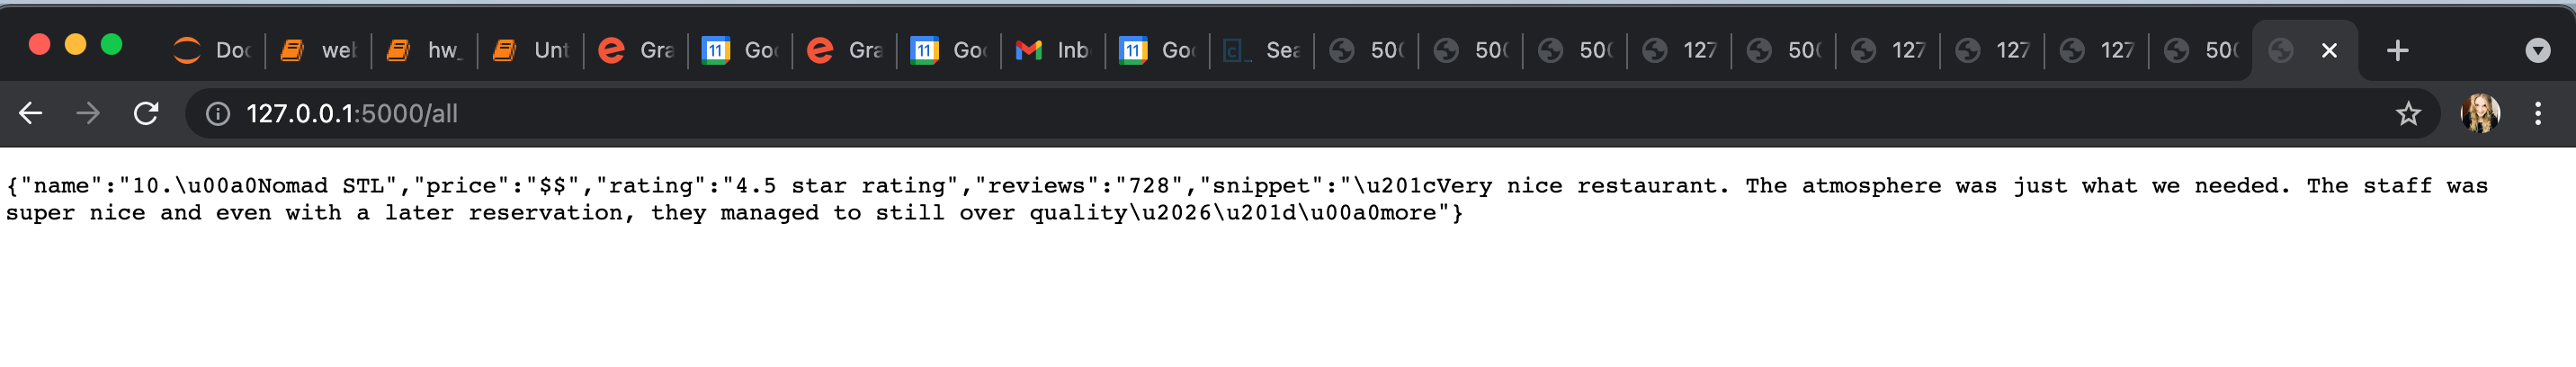

## 3. What is web scraping? Why is it helpful? Why is it sometimes in a legal grey area?

Webscraping is an automated process of retrieving and parsing information stored across the internet.

Webscraping can be very helpful because it allows you to automatically extract any data you want from internet which you can later analyze and use in any way you want. You can also later store data in different convenient formats, like csv.

I think webscraping is sometimes in a legal grey area because it's free and technically you can wescrape any kind of data. However, some of the data you webscrape might be private information(like names, contact info), some data can have copyright claims; some websites are actually non-webscrapable to protect themselves from any of that. So it's a good practice to make sure you're allowed to webscrape the website data and it won't cause any problems.